In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures

## File1

In [3]:
data = pd.read_csv('Position_Salaries.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [5]:
data.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [6]:
data.shape

(10, 3)

In [7]:
data.isnull().sum()

,0
Position,0
Level,0
Salary,0


In [8]:
data.duplicated().sum()

0

In [9]:
data['Position'].value_counts()

,count
Position,
Business Analyst,1
Junior Consultant,1
Senior Consultant,1
Manager,1
Country Manager,1
Region Manager,1
Partner,1
Senior Partner,1
C-level,1


In [10]:
label_encoder = preprocessing.LabelEncoder()
data['Position'] = label_encoder.fit_transform(data['Position'])
data.head()

,Position,Level,Salary
0,0,1,45000
1,4,2,50000
2,8,3,60000
3,5,4,80000
4,3,5,110000


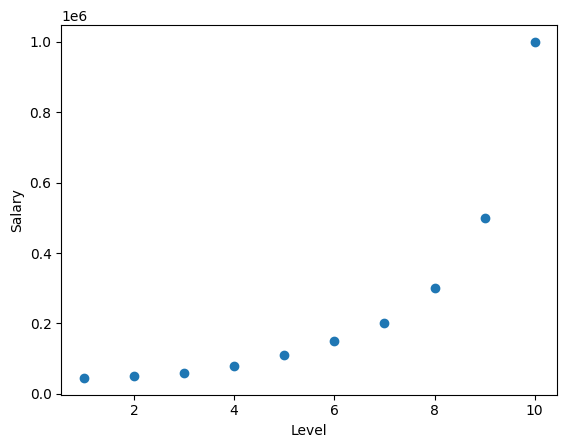

In [11]:
plt.scatter(data['Level'],data['Salary'])
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

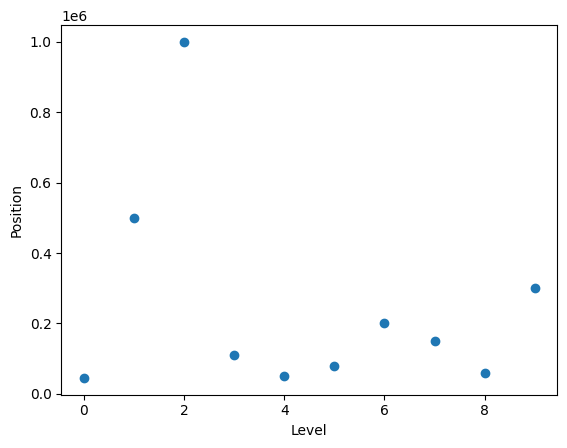

In [12]:
plt.scatter(data['Position'],data['Salary'])
plt.xlabel('Level')
plt.ylabel('Position')
plt.show()

In [13]:
X = data.drop('Salary',axis=1)
y = data['Salary']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7, 2), (3, 2), (7,), (3,))

In [15]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = scaler.fit_transform(y_train.values.reshape(-1,1))
y_test = scaler.transform(y_test.values.reshape(-1,1))

In [16]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [17]:
print(lr.coef_)
print(lr.intercept_)

[[-0.41184283  0.90827327]]
[1.00711764e-16]


In [18]:
y_test_pred = lr.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.20201936555668543


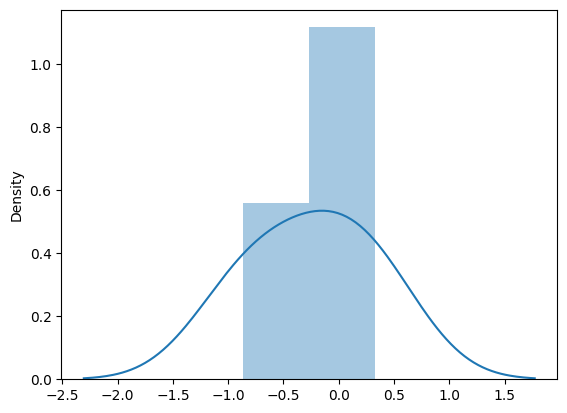

In [19]:
res = y_test - y_test_pred
sns.distplot(res)
plt.show()

In [20]:
rss = np.sum(np.square(res))
print('RSS:',rss)

mse = mean_squared_error(y_test,y_test_pred)
print('MSE:',mse)

rmse = np.sqrt(mse)
print('RMSE:',rmse)

RSS: 0.8989950354919346
MSE: 0.29966501183064487
RMSE: 0.5474166711296294


In [21]:
poly_reg = PolynomialFeatures(degree=4)

X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.transform(X_test)

In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly,y_train)

LinearRegression()

In [23]:
print(lr.coef_)
print(lr.intercept_)

[[-0.41184283  0.90827327]]
[1.00711764e-16]


In [24]:
y_test_pred = lin_reg.predict(X_test_poly)
print(r2_score(y_test,y_test_pred))

0.8148384869591212


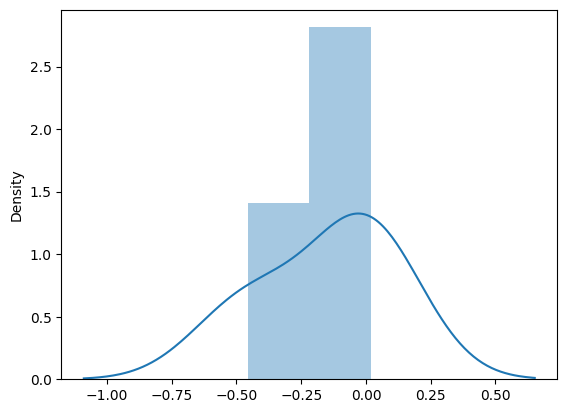

In [25]:
res = y_test - y_test_pred
sns.distplot(res)
plt.show()

In [26]:
rss = np.sum(np.square(res))
print('RSS:',rss)

mse = mean_squared_error(y_test,y_test_pred)
print('MSE:',mse)

rmse = np.sqrt(mse)
print('RMSE:',rmse)

RSS: 0.20860065245073287
MSE: 0.06953355081691096
RMSE: 0.26369215160279413


## File2

In [27]:
df = pd.read_csv('AR - Examples - 1.6.csv')
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [29]:
df.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


In [30]:
df.shape

(100, 3)

In [31]:
df.isnull().sum()

,0
number_courses,0
time_study,0
Marks,0


In [32]:
df.duplicated().sum()

0

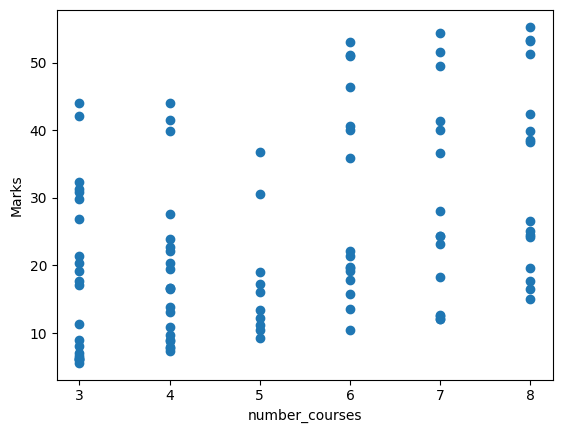

In [33]:
plt.scatter(df['number_courses'],df['Marks'])
plt.xlabel('number_courses')
plt.ylabel('Marks')
plt.show()

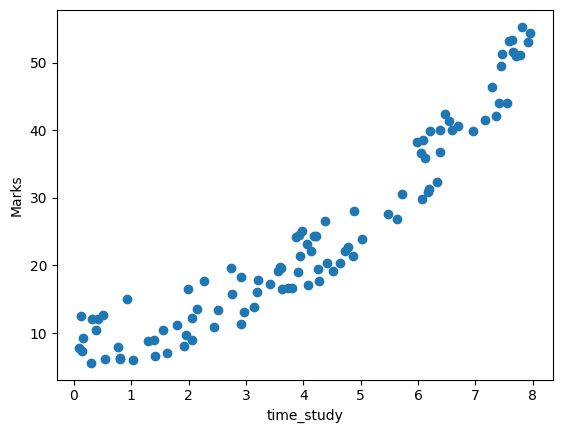

In [34]:
plt.scatter(df['time_study'],df['Marks'])
plt.xlabel('time_study')
plt.ylabel('Marks')
plt.show()

In [35]:
X = df.drop('Marks',axis=1)
y = df['Marks']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((70, 2), (30, 2), (70,), (30,))

In [37]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = scaler.fit_transform(y_train.values.reshape(-1,1))
y_test = scaler.transform(y_test.values.reshape(-1,1))

In [38]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [39]:
y_test_pred = lr.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.9417542675032118


In [40]:
print(lr.intercept_)
print(lr.coef_)

[-7.62740272e-17]
[[0.24762509 0.90056563]]


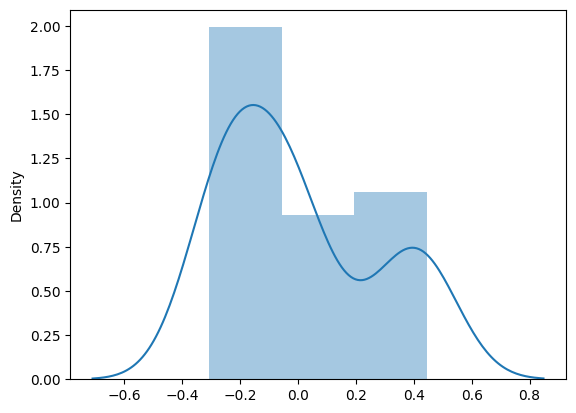

In [41]:
res = y_test - y_test_pred
sns.distplot(res)
plt.show()

In [42]:
rss = np.sum(np.square(res))
print('RSS:',rss)

mse = mean_squared_error(y_test,y_test_pred)
print('MSE:',mse)

rmse = np.sqrt(mse)
print('RMSE:',rmse)

RSS: 2.0288912042521545
MSE: 0.06762970680840515
RMSE: 0.26005712220280597


In [43]:
df['time_study_squared'] = df['time_study']**2
df.head()

,number_courses,time_study,Marks,time_study_squared
0,3,4.508,19.202,20.322064
1,4,0.096,7.734,0.009216
2,4,3.133,13.811,9.815689
3,6,7.909,53.018,62.552281
4,8,7.811,55.299,61.011721


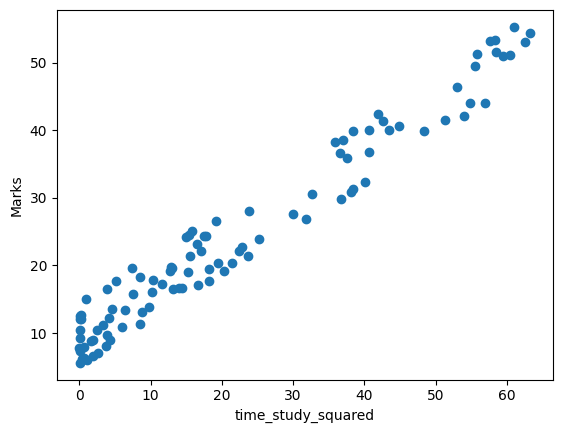

In [44]:
plt.scatter(df['time_study_squared'],df['Marks'])
plt.xlabel('time_study_squared')
plt.ylabel('Marks')
plt.show()

In [45]:
X = df.drop('Marks',axis=1)
y = df['Marks']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((70, 3), (30, 3), (70,), (30,))

In [47]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = scaler.fit_transform(y_train.values.reshape(-1,1))
y_test = scaler.transform(y_test.values.reshape(-1,1))

In [48]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [49]:
y_test_pred = lr.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.9996679390755364


In [50]:
print(lr.intercept_)
print(lr.coef_)

[1.97218675e-16]
[[ 0.2213852  -0.01334104  0.9505559 ]]


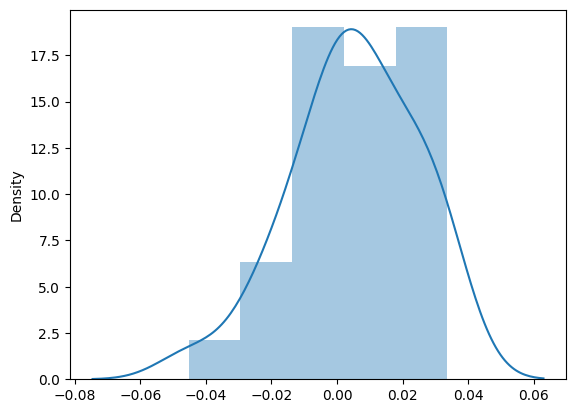

In [51]:
res = y_test - y_test_pred
sns.distplot(res)
plt.show()

In [52]:
rss = np.sum(np.square(res))
print('RSS:',rss)

mse = mean_squared_error(y_test,y_test_pred)
print('MSE:',mse)

rmse = np.sqrt(mse)
print('RMSE:',rmse)

RSS: 0.011566778543941043
MSE: 0.00038555928479803476
RMSE: 0.019635663594542323


## File3

In [53]:
df1 = pd.read_csv('AR - Examples - 1.5.csv')
df1.head()

,time,distance
0,1,0.419660
1,2,1.350692
2,3,2.470342
3,4,1.566856
4,5,1.595280


In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      120 non-null    int64  
 1   distance  120 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.0 KB


In [55]:
df1.describe()

,time,distance
count,120.000000,120.000000
mean,60.500000,4.521422
std,34.785054,1.035602
min,1.000000,0.419660
25%,30.750000,4.032310
50%,60.500000,4.713232
75%,90.250000,5.271642
max,120.000000,5.960392


In [56]:
df1.shape

(120, 2)

In [57]:
df1.isnull().sum()

,0
time,0
distance,0


In [58]:
df1.duplicated().sum()

0

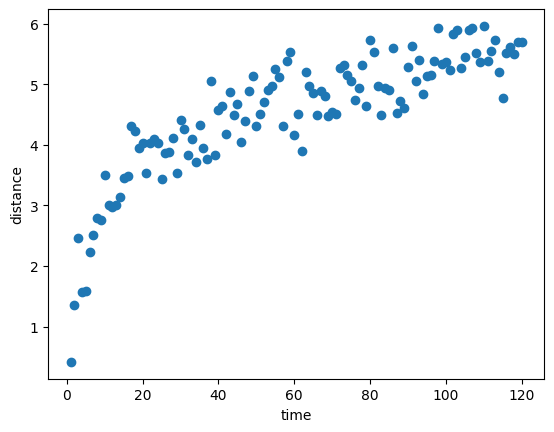

In [59]:
plt.scatter(df1['time'],df1['distance'])
plt.xlabel('time')
plt.ylabel('distance')
plt.show()

In [60]:
X = df1.drop('distance',axis=1)
y = df1['distance']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((84, 1), (36, 1), (84,), (36,))

In [62]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = scaler.fit_transform(y_train.values.reshape(-1,1))
y_test = scaler.transform(y_test.values.reshape(-1,1))

In [63]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [64]:
y_test_pred = lr.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.6569641316304557


In [65]:
print(lr.intercept_)
print(lr.coef_)

[-1.23113772e-15]
[[0.84793984]]


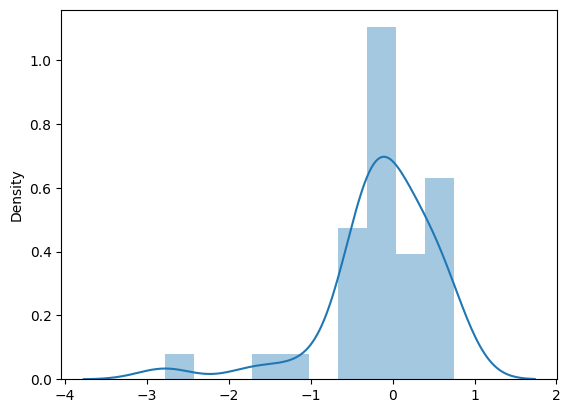

In [66]:
res = y_test - y_test_pred
sns.distplot(res)
plt.show()

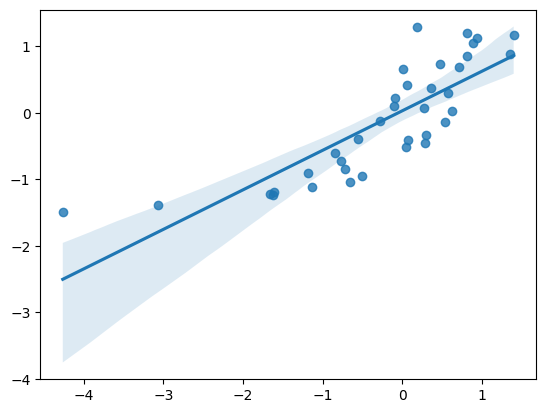

In [72]:
sns.regplot(x=y_test,y=y_test_pred)
plt.show()

## File4

In [73]:
df1 = pd.read_csv('AR - Examples - 1.5.csv')
df1.head()

,time,distance
0,1,0.419660
1,2,1.350692
2,3,2.470342
3,4,1.566856
4,5,1.595280


In [74]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      120 non-null    int64  
 1   distance  120 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.0 KB


In [75]:
df1.describe()

,time,distance
count,120.000000,120.000000
mean,60.500000,4.521422
std,34.785054,1.035602
min,1.000000,0.419660
25%,30.750000,4.032310
50%,60.500000,4.713232
75%,90.250000,5.271642
max,120.000000,5.960392


In [76]:
df1.shape

(120, 2)

In [77]:
df1.isnull().sum()

,0
time,0
distance,0


In [78]:
df1.duplicated().sum()

0

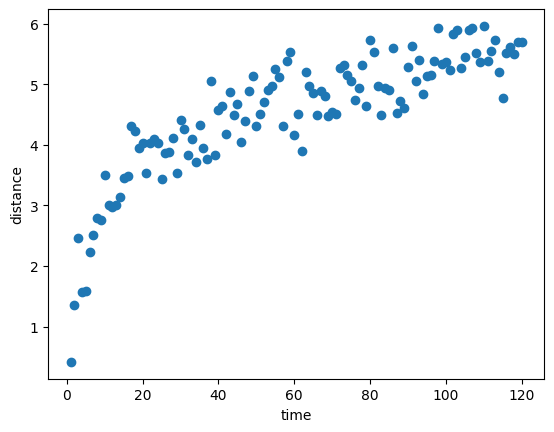

In [79]:
plt.scatter(df1['time'],df1['distance'])
plt.xlabel('time')
plt.ylabel('distance')
plt.show()

In [109]:
X = df1['time'].values.reshape(-1,1)
y = df1['distance'].values.reshape(-1,1)

In [110]:
X = scaler.fit_transform(X)
y = scaler.transform(y)

In [111]:
X.shape,y.shape

((120, 1), (120, 1))

In [112]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [113]:
y_test_pred = model.predict(X)
print(r2_score(y,y_test_pred))

0.7019700219367474


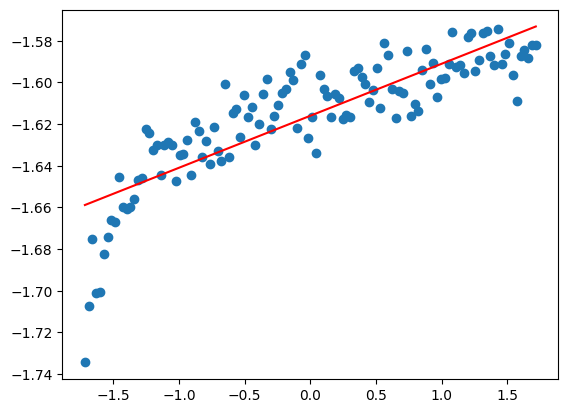

In [114]:
plt.scatter(X,y)
plt.plot(X,y_test_pred,color='red')
plt.show()

In [87]:
print(model.intercept_)
print(model.coef_)

3.0123333469173676
[0.02494362]


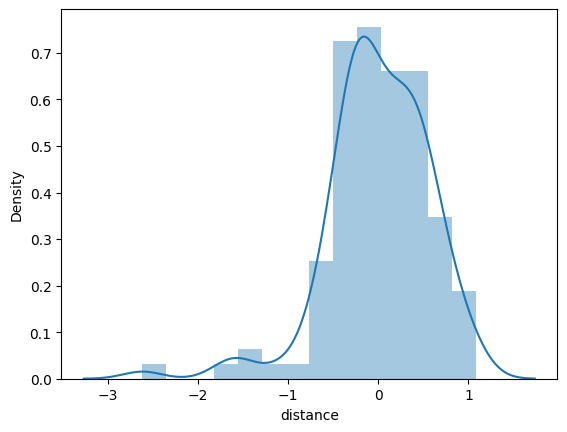

In [91]:
res = y - y_test_pred
sns.distplot(res)
plt.show()

In [90]:
rss = np.sum(np.square(res))
print('RSS:',rss)

mse = mean_squared_error(y,y_test_pred)
print('MSE:',mse)

rmse = np.sqrt(mse)
print('RMSE:',rmse)

RSS: 106560.5446818355
MSE: 0.3169650704058978
RMSE: 0.5629965101187553


In [92]:
df1['modified time'] = np.log(df1['time'])
df1.head()

,time,distance,modified time
0,1,0.419660,0.000000
1,2,1.350692,0.693147
2,3,2.470342,1.098612
3,4,1.566856,1.386294
4,5,1.595280,1.609438


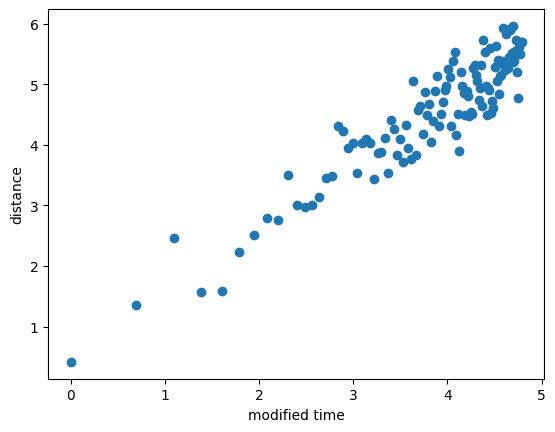

In [93]:
plt.scatter(df1['modified time'],df1['distance'])
plt.xlabel('modified time')
plt.ylabel('distance')
plt.show()

In [115]:
X = df1['modified time'].values.reshape(-1,1)
y = df1['distance'].values.reshape(-1,1)

In [116]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [117]:
y_test_pred = model.predict(X)
print(r2_score(y,y_test_pred))

0.8717123012103077


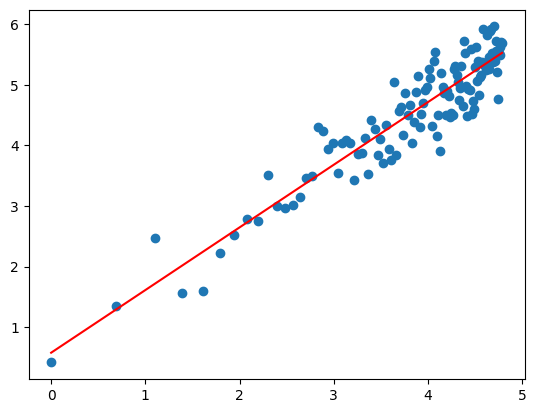

In [118]:
plt.scatter(X,y)
plt.plot(X,y_test_pred,color='red')
plt.show()

In [119]:
print(model.intercept_)
print(model.coef_)

[0.58066733]
[[1.03293534]]


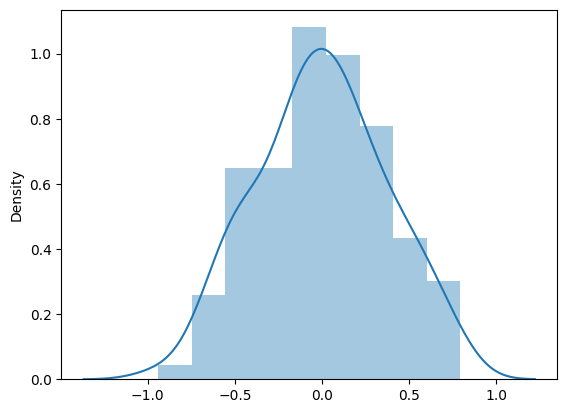

In [120]:
res = y - y_test_pred
sns.distplot(res)
plt.show()

In [121]:
rss = np.sum(np.square(res))
print('RSS:',rss)

mse = mean_squared_error(y,y_test_pred)
print('MSE:',mse)

rmse = np.sqrt(mse)
print('RMSE:',rmse)

RSS: 16.372602411340793
MSE: 0.13643835342783994
RMSE: 0.369375626466934
